# Principal Components Analysis

Goals:
- Review components of PCA and its role in modeling
- Go through a couple data demos
- Pick the relevant components to keep
- Introduce t-sne

## Quick Maths

- The first principal component of a set of features ${X_1, X_2, . . . , X_p }$ is the normalized linear combination of the features ${Z_1 = φ_{11}X_1 + φ_{21}X_2 + . . . + φ_{p1}X_p}$ that has the largest variance.



- By normalized, we mean
${\sum_{j=1}^{p}}$ ${φ^2_{j1}=1}$

	
- We refer to the elements ${φ_{11}, . . . , φ_{p1}}$ as the loadings of the
first principal component; together, the loadings make up
the principal component loading vector,
${φ_1 = (φ_{11} φ_{21} . . . φ_{p1})^T}$


In [1]:
%matplotlib inline
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [ ]:
pd.r

Analysis Borrowed from  "Introduction to Statistical Learning with Applications in R" [link](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

In [2]:
df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
df.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

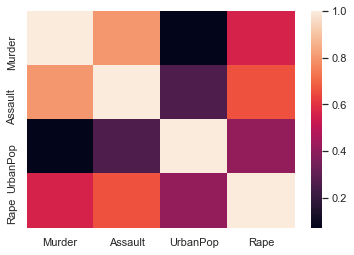

In [6]:
# Calculate and plot
corr_matrix = df.corr()
sns.heatmap(corr_matrix);

## Given the the values of the mean and variance what does this suggest we do?

In [7]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

K = pd.DataFrame(scale(df[['Murder', 'Assault']]), index=df.index, columns=df.columns)

In [8]:
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [9]:
X.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


In [16]:
# Fit PCA  Model
from sklearn.decomposition import PCA
pca = PCA()
X2D = pca.fit_transform(X)

In [17]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [19]:
# Obtain the loadings.
# What do these mean?
pca_loadings = pd.DataFrame(pca.components_.T, index=df.columns, columns=['Z1', 'Z2','Z3','Z4'])
pca_loadings

,Z1,Z2,Z3,Z4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [21]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [22]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [12]:
# Variance Explained
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

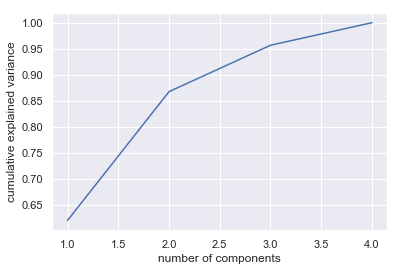

In [14]:
plt.plot([1,2,3,4],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## We really only need two components!

#### Biplot

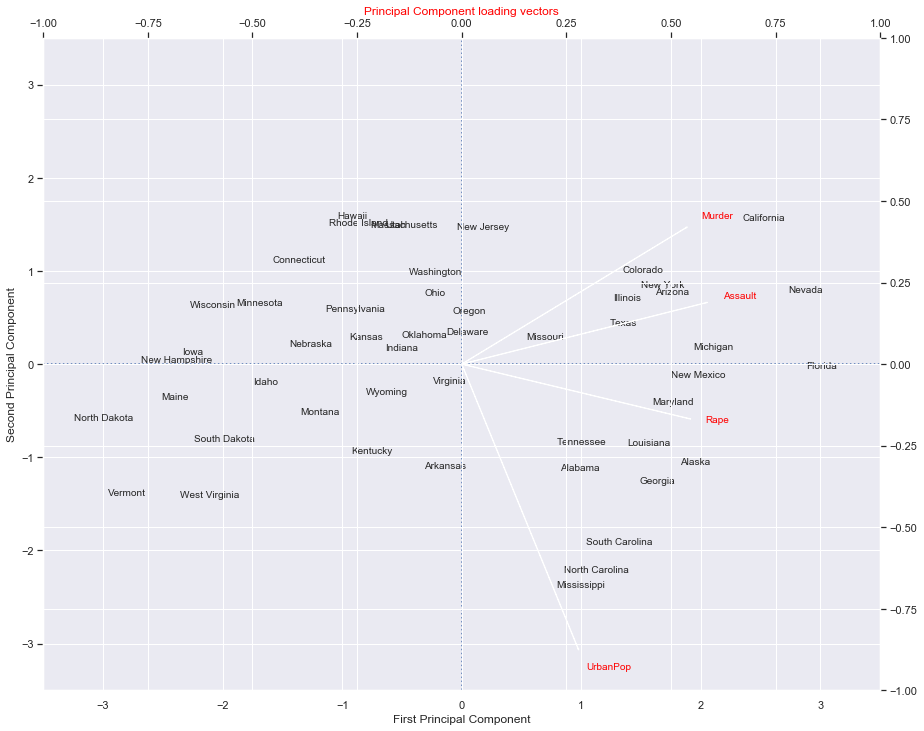

In [15]:
fig , ax1 = plt.subplots(figsize=(15,12))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='b')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='b')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['Z1', 'Z2']].index:
    ax2.annotate(i, (pca_loadings.Z1.loc[i]*a, pca_loadings.Z2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,pca_loadings.Z1[0], pca_loadings.Z2[0])
ax2.arrow(0,0,pca_loadings.Z1[1], pca_loadings.Z2[1])
ax2.arrow(0,0,pca_loadings.Z1[2], pca_loadings.Z2[2])
ax2.arrow(0,0,pca_loadings.Z1[3], pca_loadings.Z2[3])
plt.show()

## Back To Cancer Data

Breast Cancer [link](https://www.mldata.io/dataset-details/breast_cancer/#customize_download)

In [46]:
bc=pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')
bc.shape

(569, 10)

In [24]:
bc.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [45]:
bc['class'].unique()

array([2., 4.])

In [26]:
target=bc['class']
target = bc['class'].map(lambda x: 1 if x == 4 else 0)
target = pd.DataFrame(target)
target.columns=['outcome']


In [44]:
target.size

569

In [28]:
target.tail()

,outcome
564,0
565,1
566,0
567,0
568,1


In [47]:
X=bc.drop(columns=['class'])

In [48]:
len(X)

569

In [49]:
predictor = pd.DataFrame(scale(X), index=X.index, columns=X.columns)

In [50]:
predictor

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,0.159110,-0.728276,-0.767057,-0.642730,-0.564008,-0.719484,-0.211089,-0.644129,-0.359946
1,0.159110,0.271858,0.248743,0.750464,1.607310,1.691824,-0.211089,-0.320357,-0.359946
2,-0.531986,-0.728276,-0.767057,-0.642730,-0.564008,-0.451561,-0.211089,-0.644129,-0.359946
3,0.504658,1.605371,1.603144,-0.642730,-0.129745,0.084285,-0.211089,1.298500,-0.359946
4,-0.186438,-0.728276,-0.767057,0.053867,-0.564008,-0.719484,-0.211089,-0.644129,-0.359946
...,...,...,...,...,...,...,...,...,...
564,-0.186438,-0.728276,-0.767057,-0.642730,-0.564008,-0.719484,-0.211089,-0.320357,-0.359946
565,0.159110,1.271993,2.280344,2.491957,0.738782,1.691824,2.802410,2.269815,-0.359946
566,-0.531986,-0.728276,-0.428457,-0.642730,-0.564008,-0.719484,-0.211089,-0.644129,-0.359946
567,-0.186438,-0.728276,-0.767057,-0.642730,-0.564008,-0.183638,-0.641589,-0.644129,-0.359946


In [71]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 3)
X2D = pca.fit_transform(predictor)

In [54]:
pca.explained_variance_ratio_

array([0.64966419, 0.08611607, 0.06141608, 0.05159119, 0.04320369,
       0.0366013 , 0.03149687, 0.02991925, 0.00999137])

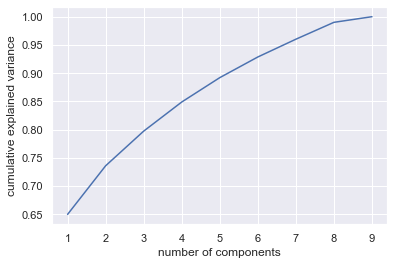

In [55]:
pca = PCA().fit(predictor)
plt.plot([1,2,3,4,5,6,7,8,9],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
#pca.components_.T[:, 0:2]    

In [57]:
pca_loadings = pd.DataFrame(PCA(n_components = 2).fit(predictor).components_.T, index=predictor.columns, 
columns=['Z1','Z2'])
pca_loadings

,Z1,Z2
clump_thickness,0.307477,-0.141859
uniformity_of_cell_size,0.381724,-0.017823
uniformity_of_cell_shape,0.378151,-0.070744
marginal_adhesion,0.327129,-0.035884
single_epithelial_cell_size,0.335355,0.183773
bare_nuclei,0.337572,-0.261138
bland_chromatin,0.339410,-0.263759
normal_nucleoli,0.336896,-0.012693
mitosis,0.233702,0.895305


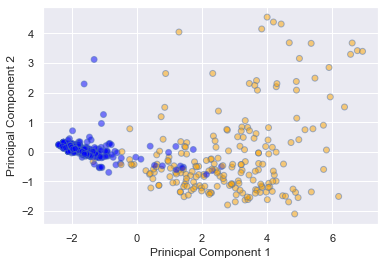

In [58]:
plt.scatter(X2D[:, 0], X2D[:, 1], edgecolor='b',c=target.outcome.map
            ({0: 'blue', 1: 'orange'}), alpha=0.5)
plt.xlabel('Prinicpal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
len(predictor)

569

In [61]:
len(target)

569

In [62]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=9) 

In [63]:
from sklearn.tree import DecisionTreeClassifier
# Initial paramters used in model
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2, class_weight='balanced')

In [64]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=2, splitter='best')

In [65]:
y_pred = clf_tree.predict(X_test)

In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X2D, target,test_size=.3, random_state=9)

In [73]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=2, splitter='best')

In [74]:
y_pred = clf_tree.predict(X_test)

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


### t-distributed Stochastic Neighbor Embedding( t-SNE)

- Find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane) such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other.


- Essentially a search for a new and less-dimensional data representation that preserves neighborship of examples.

t-SNE Tutorial: [link](https://distill.pub/2016/misread-tsne/)

In [40]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictor)

In [42]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

In [43]:
#plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

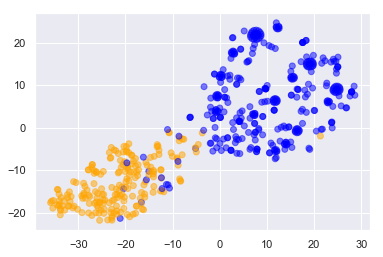

In [44]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],c=target.outcome.map
            ({0: 'blue', 1: 'orange'}), alpha=.5);